## CNN 기초

### CNN(Convolutional Neural Network)

신경망의 레이어 수가 많아질수록 입력과 출력 사이의 비선형성을 잘 표현할 수 있지만 대신 찾아내야할 파라미터의 수가 많아져서 현실적으로 최적화가 불가능하다.
이를 해결하기 위해 이미지 입력의 경우 파라미터의 수를 대폭 줄이면서 특징을 찾아내는 방법이 CNN(Convolutional Neural Network) 모형이다. 

* 파라미터 수를 줄이기 위해 전체 이미지가 아닌 일부 영역의 값만 선형조합하여 특징을 찾아낸다.
* 특징이 어느 위치에 있는지 모르기 때문에 영역을 이동시키면서(scanning) 특징을 찾는다. 다만 이동하는 동안 특징 계산 가중치값은 변하지 않는다.
* 한 종류의 특징만 사용하지 않고 여러 종류의 특징을 찾는다.

### 완전연결망

다음 그림은 기존의 완전연결망(fully-connected networkd) 혹은 밀집망(dense network)라고 불리는 기존의 신경망 모형과 CNN 모형을 비교한 것이다. 전체 이미지로부터 $i$번째 특징 $\phi_i$를 구하려면 가중치 $w_i$를 이용하여 입력 이미지의 전체 데이터 즉 $x_1$부터 $x_N$을 모두 조합해야 한다.

$$ \phi_i = \sigma \left( w_i^Tx \right) = \sigma \left( \sum_{k=0}^{N^2-1}  w_i[k] x[k]  \right) $$

이 때 가중치와 입력 이미지는 1차원 벡터로 펼친 것과 같다.

In [1]:
%load_ext tikzmagic

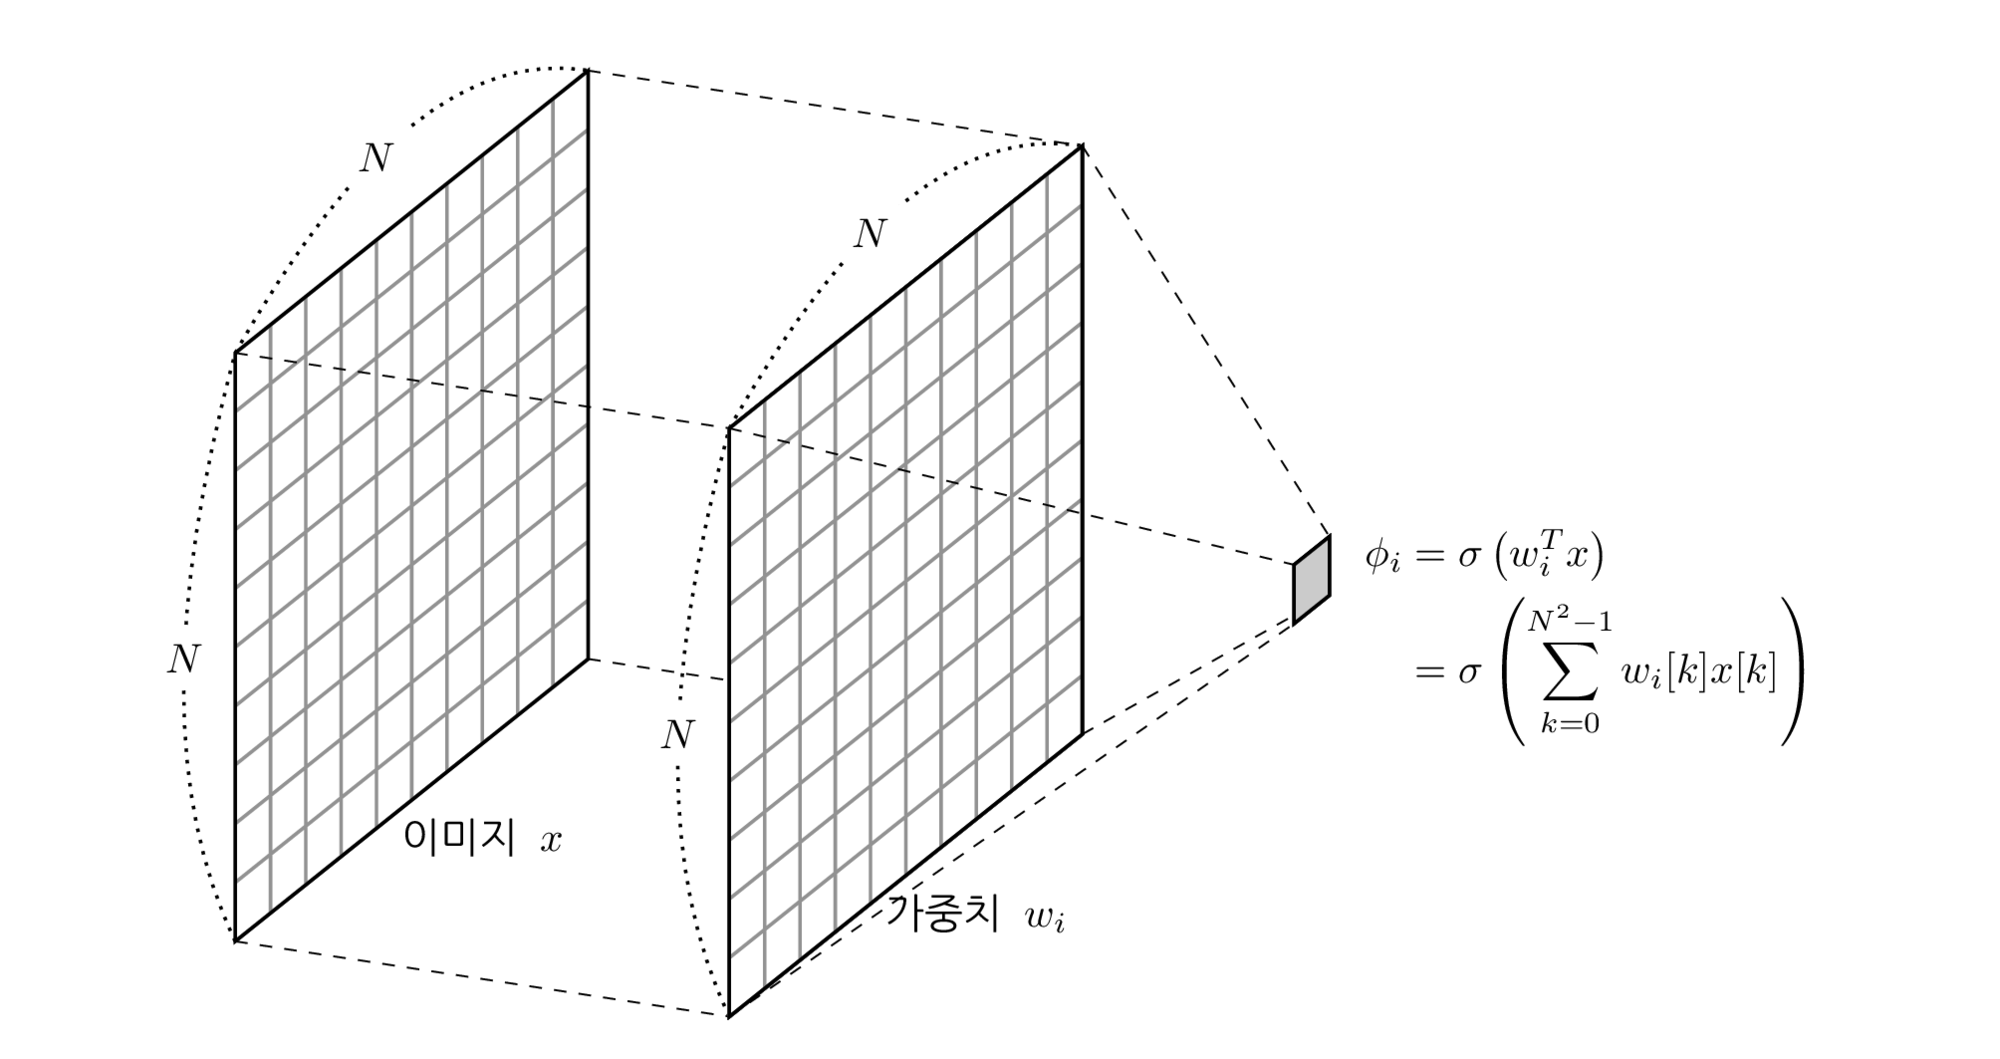

In [2]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-2,-1);
\coordinate (righttop) at (15,8);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

\begin{scope}[yslant=0.8,xscale=0.6]
    \coordinate (x1) at (0,0);
    \coordinate (x2) at (0,5);
    \coordinate (x3) at (5,5);
    \coordinate (x4) at (5,0);
    \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
    \draw[thick] (x1) rectangle (x3);
    \node at (3.5, -0.8) {이미지 $x$};
    \draw[dotted, thick] (x1) edge[bend left, pos=0.55] node[rectangle,fill=white] {$N$} (x2);
    \draw[dotted, thick] (x2) to[bend left, pos=0.4] node[rectangle,fill=white] {$N$} (x3);
\end{scope}

\begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
    \coordinate (w1) at (0,0);
    \coordinate (w2) at (0,5);
    \coordinate (w3) at (5,5);
    \coordinate (w4) at (5,0);
    \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
    \draw[thick] (w1) rectangle (w3);
    \node at (3.5, -0.8) {가중치 $w_i$};
    \draw[dotted, thick] (w1) edge[bend left, pos=0.55] node[rectangle,fill=white] {$N$} (w2);
    \draw[dotted, thick] (w2) to[bend left, pos=0.4] node[rectangle,fill=white] {$N$} (w3);
\end{scope}

\draw[dashed] (x1) -- (w1);
\draw[dashed] (x2) -- (w2);
\draw[dashed] (x3) -- (w3);
\draw[dashed] (x4) -- (w4);

\begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
    \path[fill=white] (w1) rectangle (w3);
    \draw[style=help lines,thick] (w1) grid[step=5mm] (w3);
    \draw[thick] (w1) rectangle (w3);
\end{scope}

\begin{scope}[yslant=0.8,xscale=0.6, xshift=15cm, yshift=-4.5cm]
    \coordinate (p1) at (0,0);
    \coordinate (p2) at (0,0.5);
    \coordinate (p3) at (0.5,0.5);
    \coordinate (p4) at (0.5,0);
    \draw[thick] (p1) rectangle (p3);
    \node[text width=3cm] at (3.5, -1.8) {
        $
        \begin{aligned}
        \phi_i &= \sigma \left( w_i^T x \right)  \\
               &= \sigma \left( \sum_{k=0}^{N^2-1}  w_i[k] x[k] \right)  
        \end{aligned}
        $};
\end{scope}

\draw[dashed] (w1) -- (p1);
\draw[dashed] (w2) -- (p2);
\draw[dashed] (w3) -- (p3);
\draw[dashed] (w4) -- (p4);

\begin{scope}[yslant=0.8,xscale=0.6, xshift=15cm, yshift=-4.5cm]
    \path[fill=lightgray] (p1) rectangle (p3);
    \draw[thick] (p1) rectangle (p3);
\end{scope}

### 이미지 필터링

하지만 CNN 모형에서는 입력 이미지 중 $M \times M$ 크기의 영역만을 이용하여 특징 $\phi_{ij}$를 계산한다. 

$$ \phi_{i,j,k} = \sigma \left( \sum_{k_1=0}^{M-1}\sum_{k_2=0}^{M-1} w[k_1, k_2] x[i+k_1, j+k_2] \right) $$

이 식에서는 입력 데이터 $x$와 가중치 $w$를 1차원 벡터로 펼치지 않고 2차원인 행렬 형태 그대로 사용하므로 $x[\cdot,\cdot]$ 기호로 표현하였다. 
이러한 계산방식을 이미지 필터링(image filtering)이라고 한다. 이미지 필터링에서 가중치는 커널(kernel), 필터(filter), 마스크(mask)라고도 부른다.
$i,j$는 특징을 계산하는데 사용되는 입력 이미지의 위치를 나타낸다. $k$는 여러가지의 가중치값을 병렬적으로 동시에 사용할 때 어떤 가중치인지를 나타낸다. 

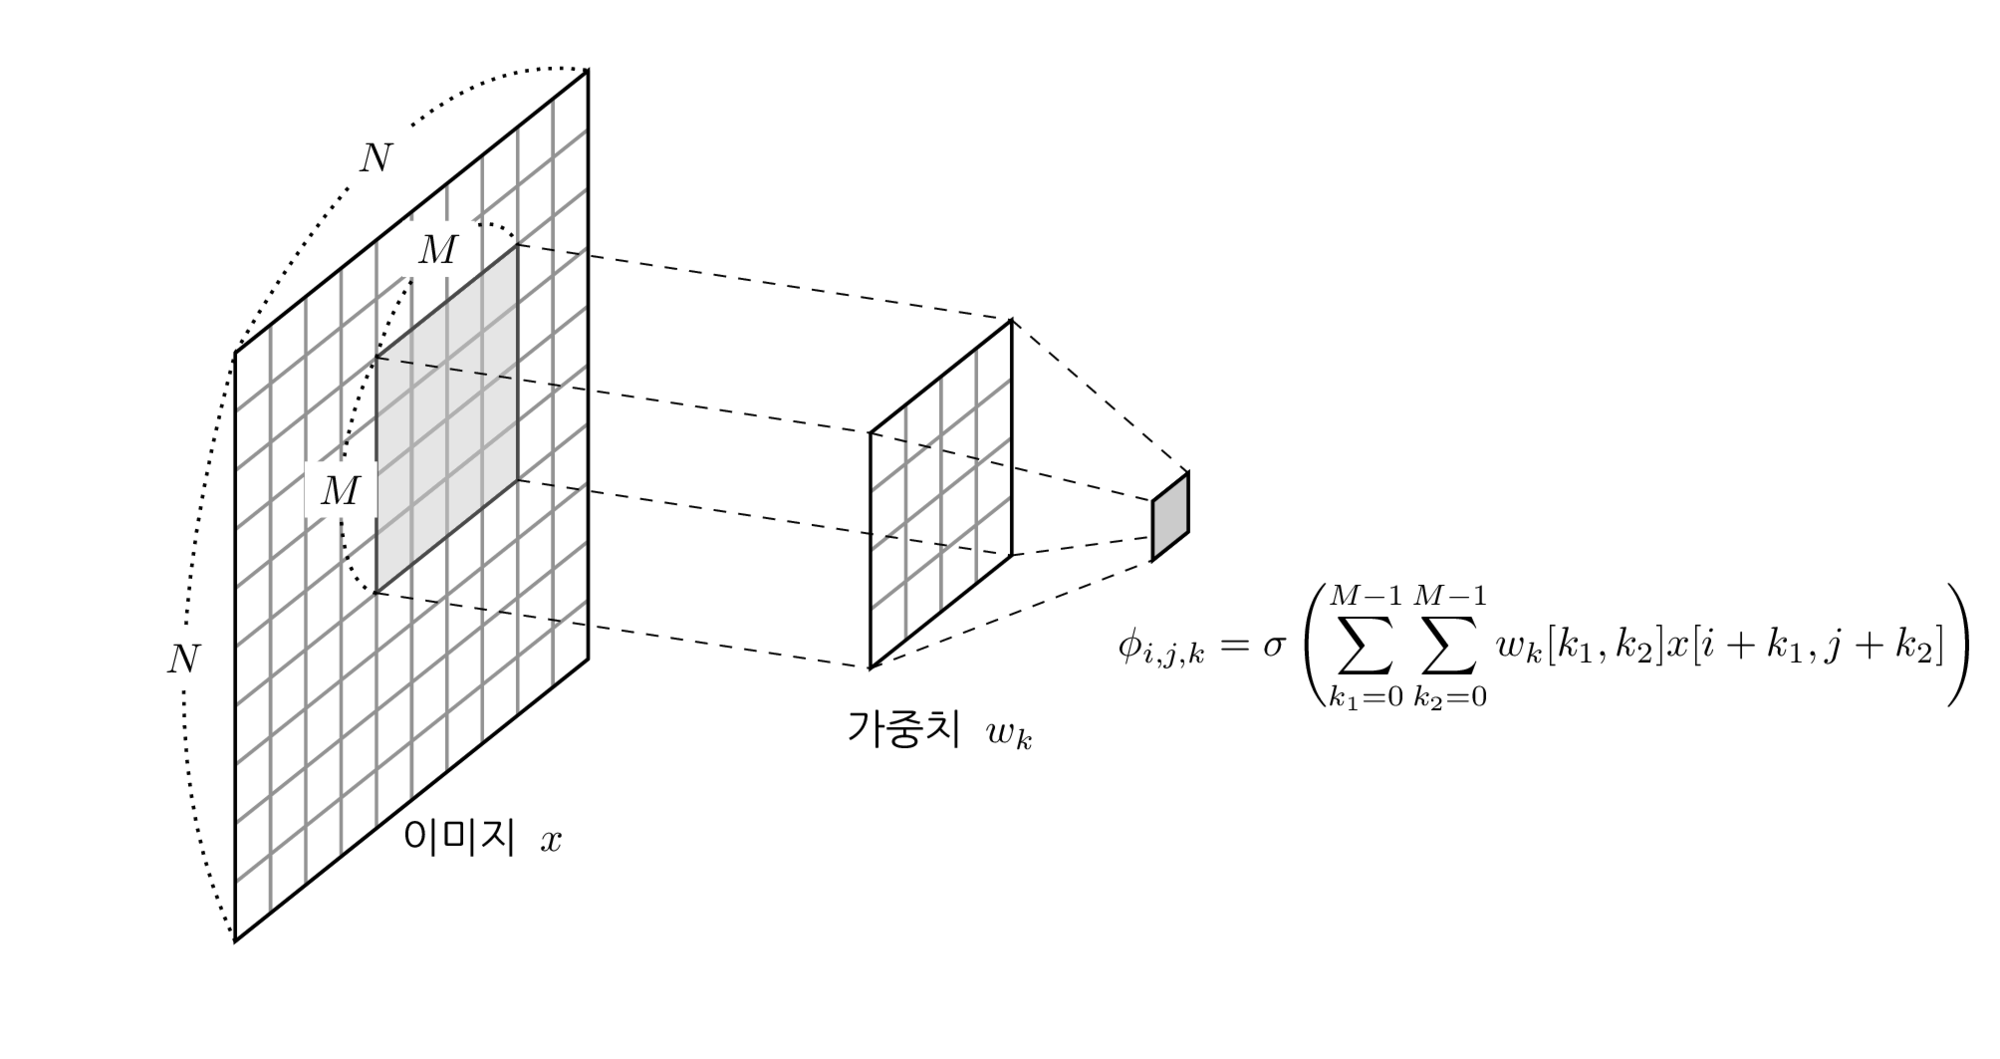

In [3]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-2,-1);
\coordinate (righttop) at (15,8);
\fill[white, use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

\begin{scope}[yslant=0.8,xscale=0.6]
    \coordinate (x01) at (0,0);
    \coordinate (x02) at (0,5);
    \coordinate (x03) at (5,5);
    \coordinate (x04) at (5,0);
    \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
    \draw[thick] (x01) rectangle (x03);
    \node at (3.5, -0.8) {이미지 $x$};
    \draw[dotted, thick] (x01) edge[bend left, pos=0.55] node[rectangle,fill=white] {$N$} (x02);
    \draw[dotted, thick] (x02) to[bend left, pos=0.4] node[rectangle,fill=white] {$N$} (x03);
\end{scope}

\begin{scope}[yslant=0.8,xscale=0.6]
    \coordinate (x1) at (2,2);
    \coordinate (x2) at (2,4);
    \coordinate (x3) at (4,4);
    \coordinate (x4) at (4,2);
    \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
    \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \draw[dotted, thick] (x1) edge[bend left=60, pos=0.55] node[rectangle,fill=white] {$M$} (x2);
    \draw[dotted, thick] (x2) to[bend left=60, pos=0.45] node[rectangle,fill=white] {$M$} (x3);
\end{scope}

\begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
    \coordinate (w1) at (2,2);
    \coordinate (w2) at (2,4);
    \coordinate (w3) at (4,4);
    \coordinate (w4) at (4,2);
    \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
    \draw[thick] (w1) rectangle (w3);
    \node at (3, 1) {가중치 $w_k$};
\end{scope}

\draw[dashed] (x1) -- (w1);
\draw[dashed] (x2) -- (w2);
\draw[dashed] (x3) -- (w3);
\draw[dashed] (x4) -- (w4);

\begin{scope}[yslant=0.8,xscale=0.6, xshift=13cm, yshift=-3cm]
    \coordinate (p1) at (0,0);
    \coordinate (p2) at (0,0.5);
    \coordinate (p3) at (0.5,0.5);
    \coordinate (p4) at (0.5,0);
    \draw[thick] (p1) rectangle (p3);
    \node[text width=3cm] at (2, -1.7) {
        $
        \begin{aligned}
        \phi_{i,j,k} &= \sigma \left( \sum_{k_1=0}^{M-1}\sum_{k_2=0}^{M-1} w_k[k_1,k_2] x[i+k_1, j+k_2] \right)  
        \end{aligned}
        $};
\end{scope}

\draw[dashed] (w1) -- (p1);
\draw[dashed] (w2) -- (p2);
\draw[dashed] (w3) -- (p3);
\draw[dashed] (w4) -- (p4);

\begin{scope}[yslant=0.8,xscale=0.6, xshift=13cm, yshift=-3cm]
    \path[fill=lightgray] (p1) rectangle (p3);
    \draw[thick] (p1) rectangle (p3);
\end{scope}

### 스트라이딩

이 때 가중치를 곱하는 위치 $i,j$를 변화시키는 것을 스트라이딩(striding)이라고 한다. 정상적인 방법으로 스트라이딩 하면 $i=0, j=0$부터 $i=N-M, j=N-M$까지 바뀔 수 있다. 이렇게 되면 특징값 행렬은 원래의 이미지 행렬보다 폭과 높이가 $M-1$만큼 작아진 $(N-M+1) \times (N-M+1)$ 크기의 이미지가 된다.

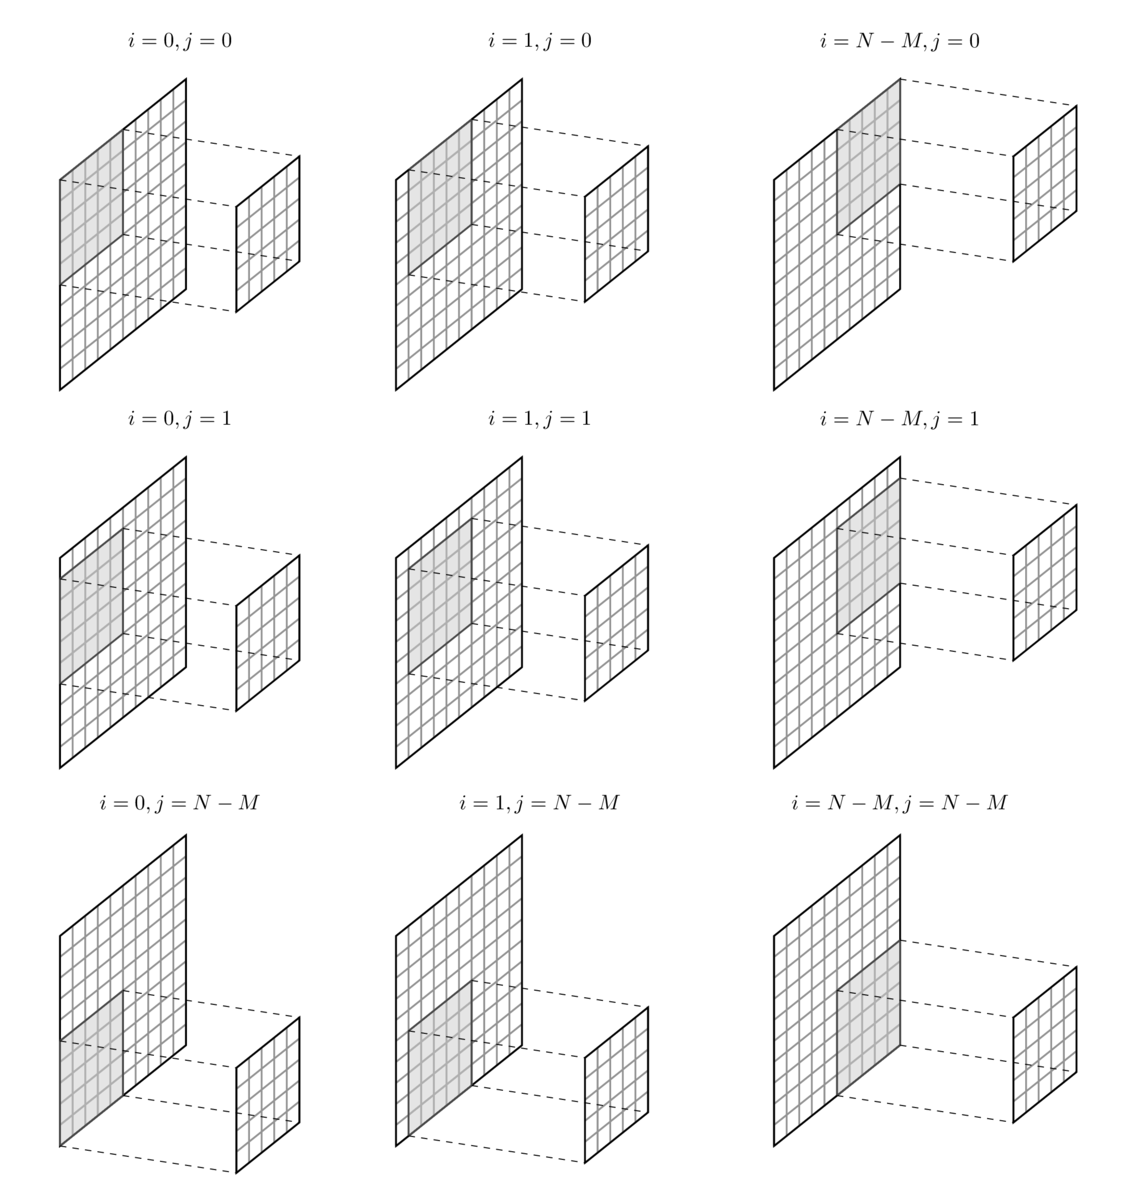

In [4]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-1,-13.5);
\coordinate (righttop) at (18,6.5);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines,white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

\node at (2, 5.8) {$i=0, j=0$};
\begin{scope}[scale=0.7]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0,2.5);
        \coordinate (x2) at (0,5);
        \coordinate (x3) at (2.5,5);
        \coordinate (x4) at (2.5,2.5);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0,2.5);
        \coordinate (w2) at (0,5);
        \coordinate (w3) at (2.5,5);
        \coordinate (w4) at (2.5,2.5);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (8, 5.8) {$i=1, j=0$};
\begin{scope}[scale=0.7, xshift=8cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0.5,2.5);
        \coordinate (x2) at (0.5,5);
        \coordinate (x3) at (3,5);
        \coordinate (x4) at (3,2.5);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0.5,2.5);
        \coordinate (w2) at (0.5,5);
        \coordinate (w3) at (3,5);
        \coordinate (w4) at (3,2.5);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (14, 5.8) {$i=N-M, j=0$};
\begin{scope}[scale=0.7, xshift=17cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (2.5,2.5);
        \coordinate (x2) at (2.5,5);
        \coordinate (x3) at (5,5);
        \coordinate (x4) at (5,2.5);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (2.5,2.5);
        \coordinate (w2) at (2.5,5);
        \coordinate (w3) at (5,5);
        \coordinate (w4) at (5,2.5);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (2, -0.5) {$i=0, j=1$};
\begin{scope}[scale=0.7, yshift=-9cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0,2);
        \coordinate (x2) at (0,4.5);
        \coordinate (x3) at (2.5,4.5);
        \coordinate (x4) at (2.5,2);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0,2);
        \coordinate (w2) at (0,4.5);
        \coordinate (w3) at (2.5,4.5);
        \coordinate (w4) at (2.5,2);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (8, -0.5) {$i=1, j=1$};
\begin{scope}[scale=0.7, xshift=8cm, yshift=-9cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0.5,2);
        \coordinate (x2) at (0.5,4.5);
        \coordinate (x3) at (3,4.5);
        \coordinate (x4) at (3,2);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0.5,2);
        \coordinate (w2) at (0.5,4.5);
        \coordinate (w3) at (3,4.5);
        \coordinate (w4) at (3,2);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (14, -0.5) {$i=N-M, j=1$};
\begin{scope}[scale=0.7, xshift=17cm, yshift=-9cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (2.5,2);
        \coordinate (x2) at (2.5,4.5);
        \coordinate (x3) at (5,4.5);
        \coordinate (x4) at (5,2);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (2.5,2);
        \coordinate (w2) at (2.5,4.5);
        \coordinate (w3) at (5,4.5);
        \coordinate (w4) at (5,2);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (2, -6.9) {$i=0, j=N-M$};
\begin{scope}[scale=0.7, yshift=-18cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0,0);
        \coordinate (x2) at (0,2.5);
        \coordinate (x3) at (2.5,2.5);
        \coordinate (x4) at (2.5,0);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0,0);
        \coordinate (w2) at (0,2.5);
        \coordinate (w3) at (2.5,2.5);
        \coordinate (w4) at (2.5,0);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (8, -6.9) {$i=1, j=N-M$};
\begin{scope}[scale=0.7, xshift=8cm, yshift=-18cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (0.5,0);
        \coordinate (x2) at (0.5,2.5);
        \coordinate (x3) at (3,2.5);
        \coordinate (x4) at (3,0);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (0.5,0);
        \coordinate (w2) at (0.5,2.5);
        \coordinate (w3) at (3,2.5);
        \coordinate (w4) at (3,0);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (14, -6.9) {$i=N-M, j=N-M$};
\begin{scope}[scale=0.7, xshift=17cm, yshift=-18cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (2.5,0);
        \coordinate (x2) at (2.5,2.5);
        \coordinate (x3) at (5,2.5);
        \coordinate (x4) at (5,0);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7cm, yshift=-4cm]
        \coordinate (w1) at (2.5,0);
        \coordinate (w2) at (2.5,2.5);
        \coordinate (w3) at (5,2.5);
        \coordinate (w4) at (5,0);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

### 동일크기 패딩

이렇게 출력 이미지의 크기가 입력 이미지의 크기와 달라지는 것을 막기위해 이미지의 바깥부분을 포함하여 필터링을 할 수도 있다. 이렇게 하는 것을 **동일크기 패딩(same-size padding)** 또는 간단히 패딩이라고 한다. 패딩을 하게 되면  원래 이미지의 가장자리에 $(M-1)/2$만큼의 가장자리가 있는 것처럼 이미지를 확장한다. 필터의 크기 $M$이 홀수인 경우 계산이 간단해지므로 홀수 크기의 필터를 주로 사용한다. 

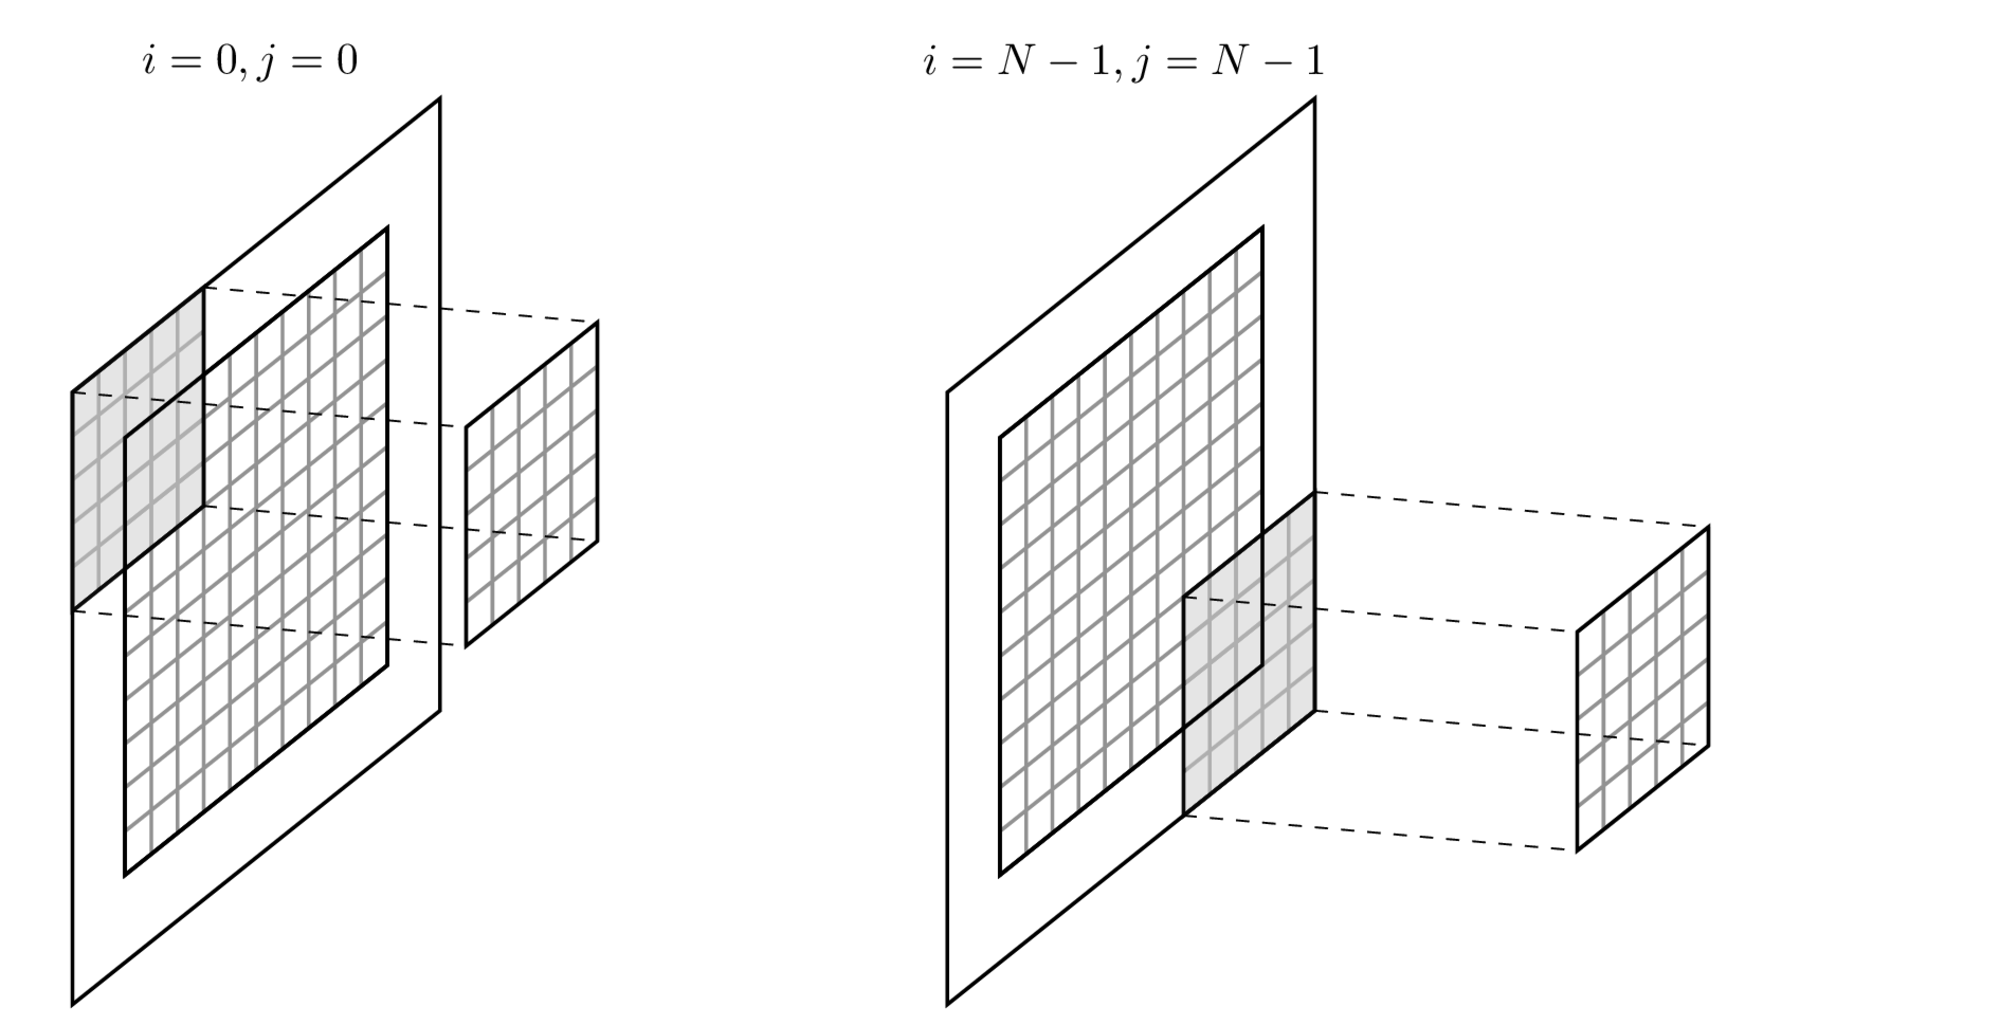

In [5]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-1,-1.2);
\coordinate (righttop) at (15,7);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines,white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

\node at (1, 6.5) {$i=0, j=0$};
\begin{scope}[scale=0.7]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}
    
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x11) at (-1,-1);
        \coordinate (x12) at (-1,6);
        \coordinate (x13) at (6,6);
        \coordinate (x14) at (6,-1);
        \draw[thick] (x11) rectangle (x13);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (-1,3.5);
        \coordinate (x2) at (-1,6);
        \coordinate (x3) at (1.5,6);
        \coordinate (x4) at (1.5,3.5);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
        \draw[thick, black, opacity=0.9] (x1) rectangle (x3);
    \end{scope}
    
    \begin{scope}[yslant=0.8,xscale=0.6]
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7.5cm, yshift=-4cm]
        \coordinate (w1) at (-1,3.5);
        \coordinate (w2) at (-1,6);
        \coordinate (w3) at (1.5,6);
        \coordinate (w4) at (1.5,3.5);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

\node at (8, 6.5) {$i=N-1, j=N-1$};
\begin{scope}[scale=0.7, xshift=10cm]
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x01) at (0,0);
        \coordinate (x02) at (0,5);
        \coordinate (x03) at (5,5);
        \coordinate (x04) at (5,0);
        \draw[style=help lines,thick] (x01) grid[step=5mm] (x03);
        \draw[thick] (x01) rectangle (x03);
    \end{scope}
    
    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x11) at (-1,-1);
        \coordinate (x12) at (-1,6);
        \coordinate (x13) at (6,6);
        \coordinate (x14) at (6,-1);
        \draw[thick] (x11) rectangle (x13);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6]
        \coordinate (x1) at (3.5,-1);
        \coordinate (x2) at (3.5,1.5);
        \coordinate (x3) at (6,1.5);
        \coordinate (x4) at (6,-1);
        \draw[style=help lines, thick] (x1) grid[step=5mm] (x3);
        \draw[thick, fill=lightgray, opacity=0.5] (x1) rectangle (x3);
        \draw[thick, black, opacity=0.9] (x1) rectangle (x3);
    \end{scope}
    
    \begin{scope}[yslant=0.8,xscale=0.6]
        \draw[thick] (x01) rectangle (x03);
    \end{scope}

    \begin{scope}[yslant=0.8,xscale=0.6, xshift=7.5cm, yshift=-4cm]
        \coordinate (w1) at (3.5,-1);
        \coordinate (w2) at (3.5,1.5);
        \coordinate (w3) at (6,1.5);
        \coordinate (w4) at (6,-1);
        \draw[style=help lines, thick] (w1) grid[step=5mm] (w3);
        \draw[thick] (w1) rectangle (w3);
    \end{scope}

    \draw[dashed] (x1) -- (w1);
    \draw[dashed] (x2) -- (w2);
    \draw[dashed] (x3) -- (w3);
    \draw[dashed] (x4) -- (w4);
\end{scope}

### 특징지도

필터링은 수학적으로 내적이므로 코사인 유사도를 계산하는 것과 같다. 따라서 특정한 모양의 필터로 이미지를 필터링하면 그 필터의 모양과 닮은 이미지가 있는 위치의 결과값이 커진다. 따라서 이미지 필터링의 결과로 나오는 이미지는 필터와 유사한 모양 혹은 패턴을 가지는 이미지가 있는 위치를 표시하는 지도와 같다. 이런 의미에서 필터링 결과로 나타나는 이미지를 **특징지도(feature map)**라고도 한다. 여기에서 특징지도의 특징이라는 말은 입력 데이터를 가리키는 것이 아니라 필터의 가중치 형태를 가리킨다.

다음 코드는 동일한 사각형 이미지를 세로모양의 필터와 가로모양의 필터로 필터링한 결과를 보여준다. 여기에서는 사이파이 패키지의 `convolve()` 함수를 사용하여 이미지 필터링을 수행하였다.

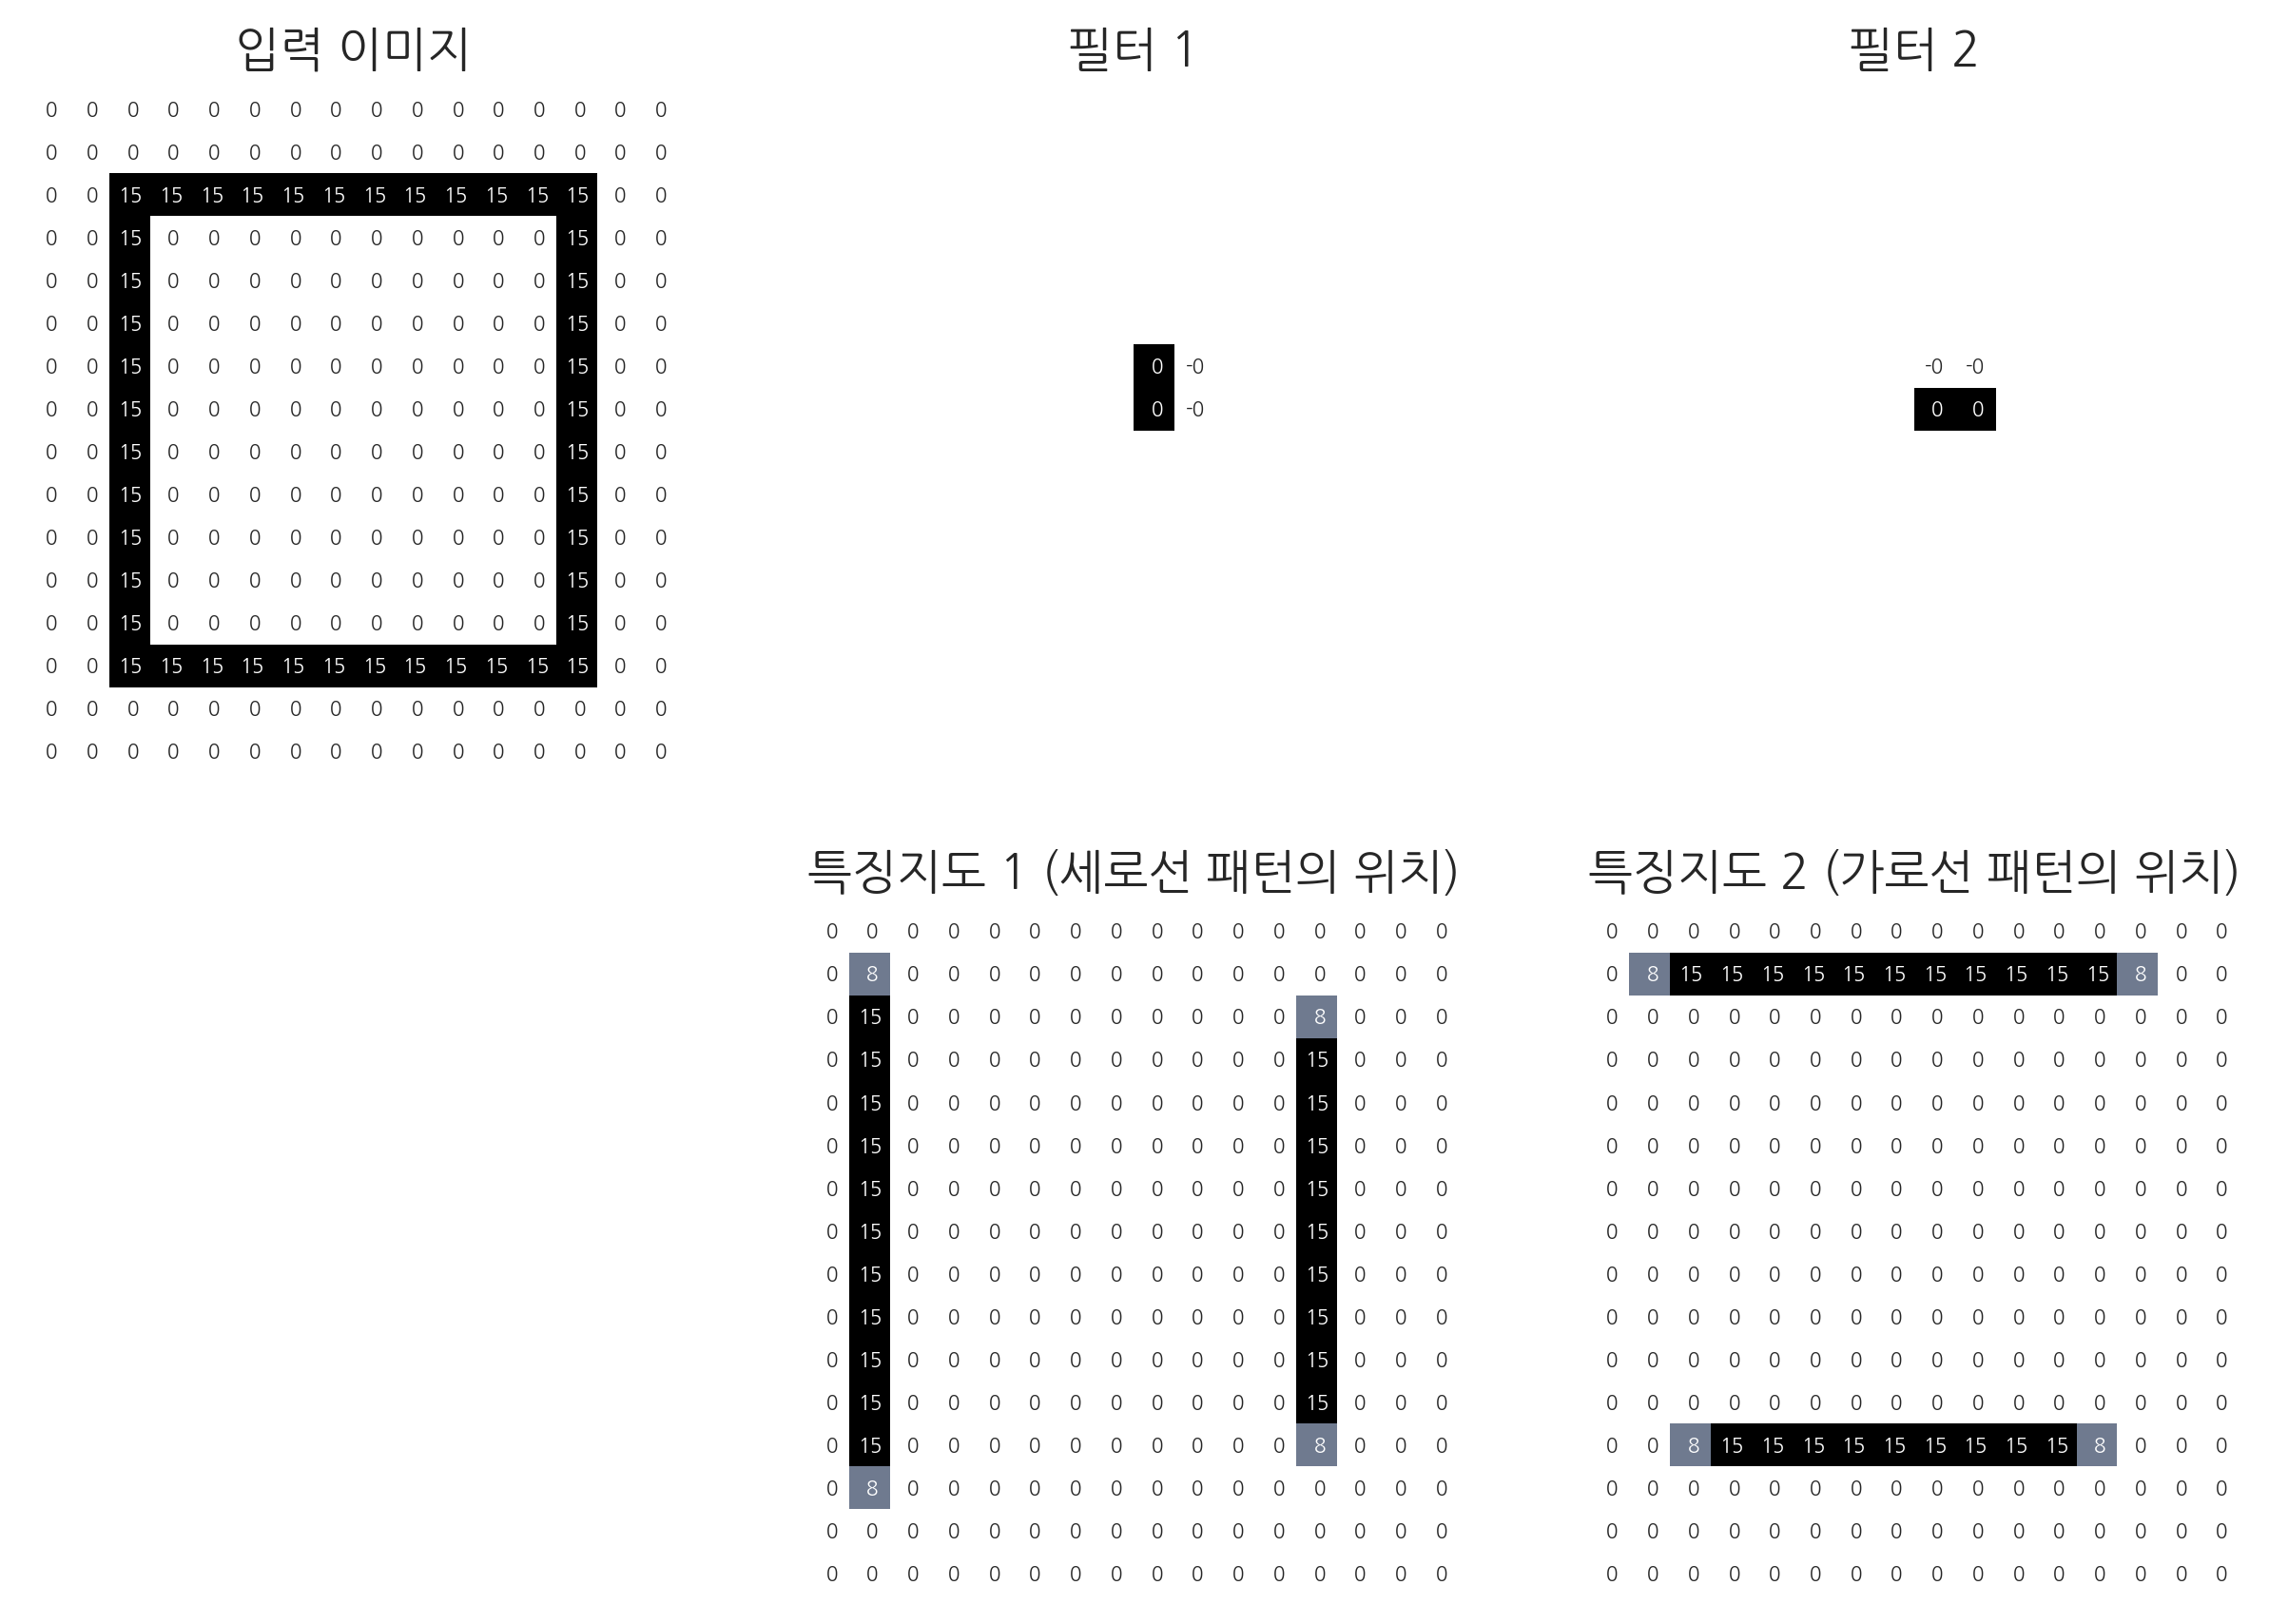

In [6]:
from scipy.ndimage.filters import convolve

r1 = np.zeros(16)
r2 = np.hstack([np.zeros(2), np.ones(12), np.zeros(2)])
r3 = np.insert(np.insert(np.zeros(14), 2, 1), -2, 1)
x = 15 * np.vstack([r1, r1, r2, np.tile(r3, (10, 1)), r2, r1, r1])

# 세로모양 필터
k1 = np.zeros((2, 2))
k1[:, 0] = 0.5
k1[:, 1] = -0.5

# 가로모양 필터
k2 = np.zeros((2, 2))
k2[0, :] = 0.5
k2[1, :] = -0.5

# 음수값 제거 (ReLu 활성화 함수)
phi1 = np.maximum(0, convolve(x, k1))
phi2 = np.maximum(0, convolve(x, k2))

def plot_heatmat(x):
    sns.heatmap(x, cmap=mpl.cm.bone_r, annot=True, fmt="2.0f",
            cbar=False, xticklabels=False, yticklabels=False,
            annot_kws={"size": 5})
    
plt.figure(figsize=(10, 7))
plt.subplot(231)
plot_heatmat(x)
plt.title("입력 이미지")
plt.subplot(232)
plot_heatmat(k1)
plt.title("필터 1")
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.subplot(233)
plot_heatmat(k2)
plt.title("필터 2")
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.subplot(235)
plot_heatmat(phi1)
plt.title("특징지도 1 (세로선 패턴의 위치)")
plt.subplot(236)
plot_heatmat(phi2)
plt.title("특징지도 2 (가로선 패턴의 위치)")
plt.show()

### 최대값 풀링

이미지 필터링을 한 출력결과를 보면 각각의 출력값이 인접한 출력값과 유사하다. 그 이유는 인접한 출력값은 입력 이미지 중에서 거의 부분을 입력으로 사용하기 때문이다. 이렇게 중복되거나 상관관계가 높은 출력값을 없애기 위해 결과 이미지에서 주변에 있는 몇 개의 출력값을 묶어서 하나의 값으로 통일하는 것을 **풀링(pooling)**이라고 한다. 만약 2x2 개의 영역을 하나의 대표값으로 묶는 풀링을 하게되면 출력 이미지의 크기는 절반으로 줄어든다.

풀링을 할 때 각 영역에서 가장 큰 값을 대표값으로 사용하는 **최대값 풀링(max pooling)**을 주로 사용한다. 최대값의 크기는 그 영역내에 필터의 모양과 일치하는 이미지가 있는지를 나타내는 지표가 되기 때문이다. 

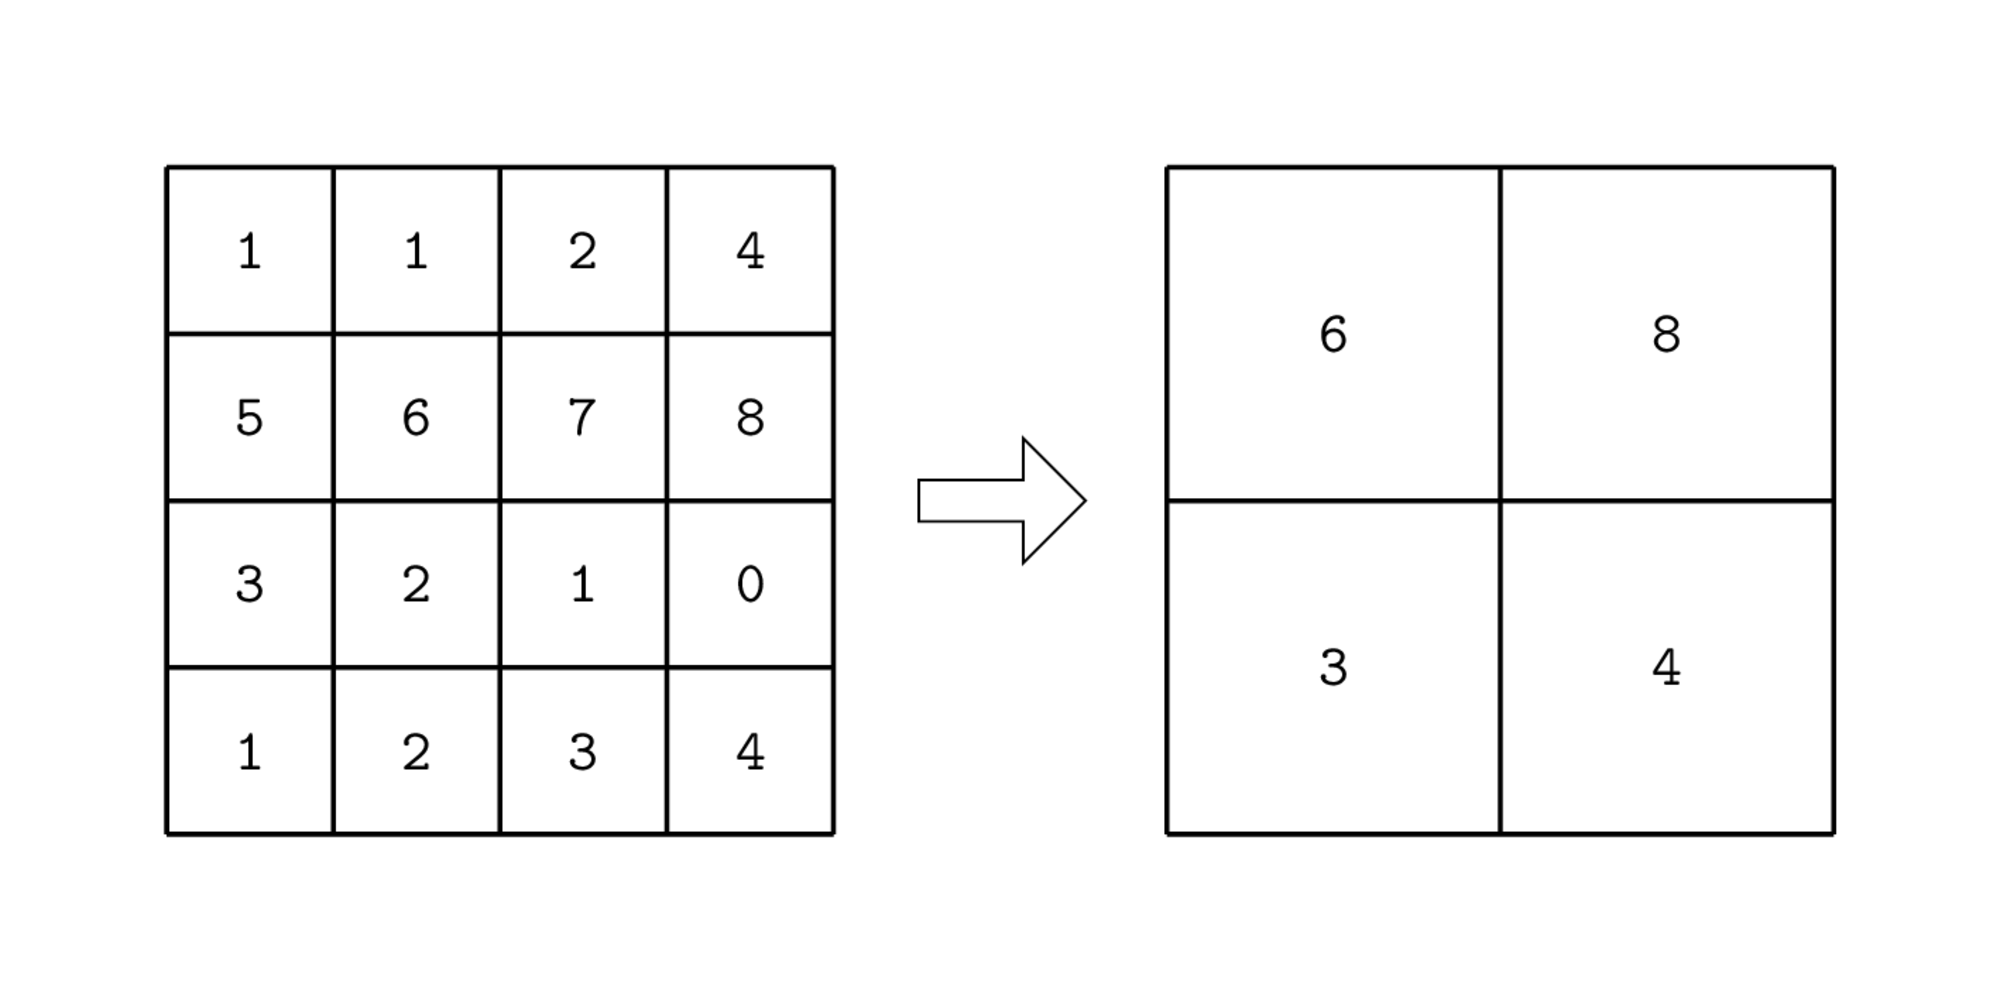

In [7]:
%%tikz -p kotex,pgfplots,amsmath -l arrows.meta,calc,positioning,shapes -s 2000,1200 -f png

\coordinate (leftbottom) at (-1,-1);
\coordinate (righttop) at (11,5);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines, white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

\node at (0.5, 0.5) {1};
\node at (1.5, 0.5) {2};
\node at (2.5, 0.5) {3};
\node at (3.5, 0.5) {4};
\node at (0.5, 1.5) {3};
\node at (1.5, 1.5) {2};
\node at (2.5, 1.5) {1};
\node at (3.5, 1.5) {0};
\node at (0.5, 2.5) {5};
\node at (1.5, 2.5) {6};
\node at (2.5, 2.5) {7};
\node at (3.5, 2.5) {8};
\node at (0.5, 3.5) {1};
\node at (1.5, 3.5) {1};
\node at (2.5, 3.5) {2};
\node at (3.5, 3.5) {4};
\draw[thick] (0,0) grid (4,4);

\node[draw, single arrow, minimum height=1cm] at (4.95,2) {};

\node at (7,1) {3};
\node at (9,1) {4};
\node at (7,3) {6};
\node at (9,3) {8};
\draw[step=2cm, thick] (6,0) grid (10,4);

### 채널

하나의 필터 이미지는 하나의 특징만 찾아서 특징지도를 그린다. 하지만 제대로 된 분석을 하려면 여러개의 특징에 대해 특징지도를 만들어야 하므로 복수의 필터를 동시에 사용하여 이미지를 필터링한다. 이 때 사용되는 필터의 개수를 **채널(channel)**이라고 한다. 

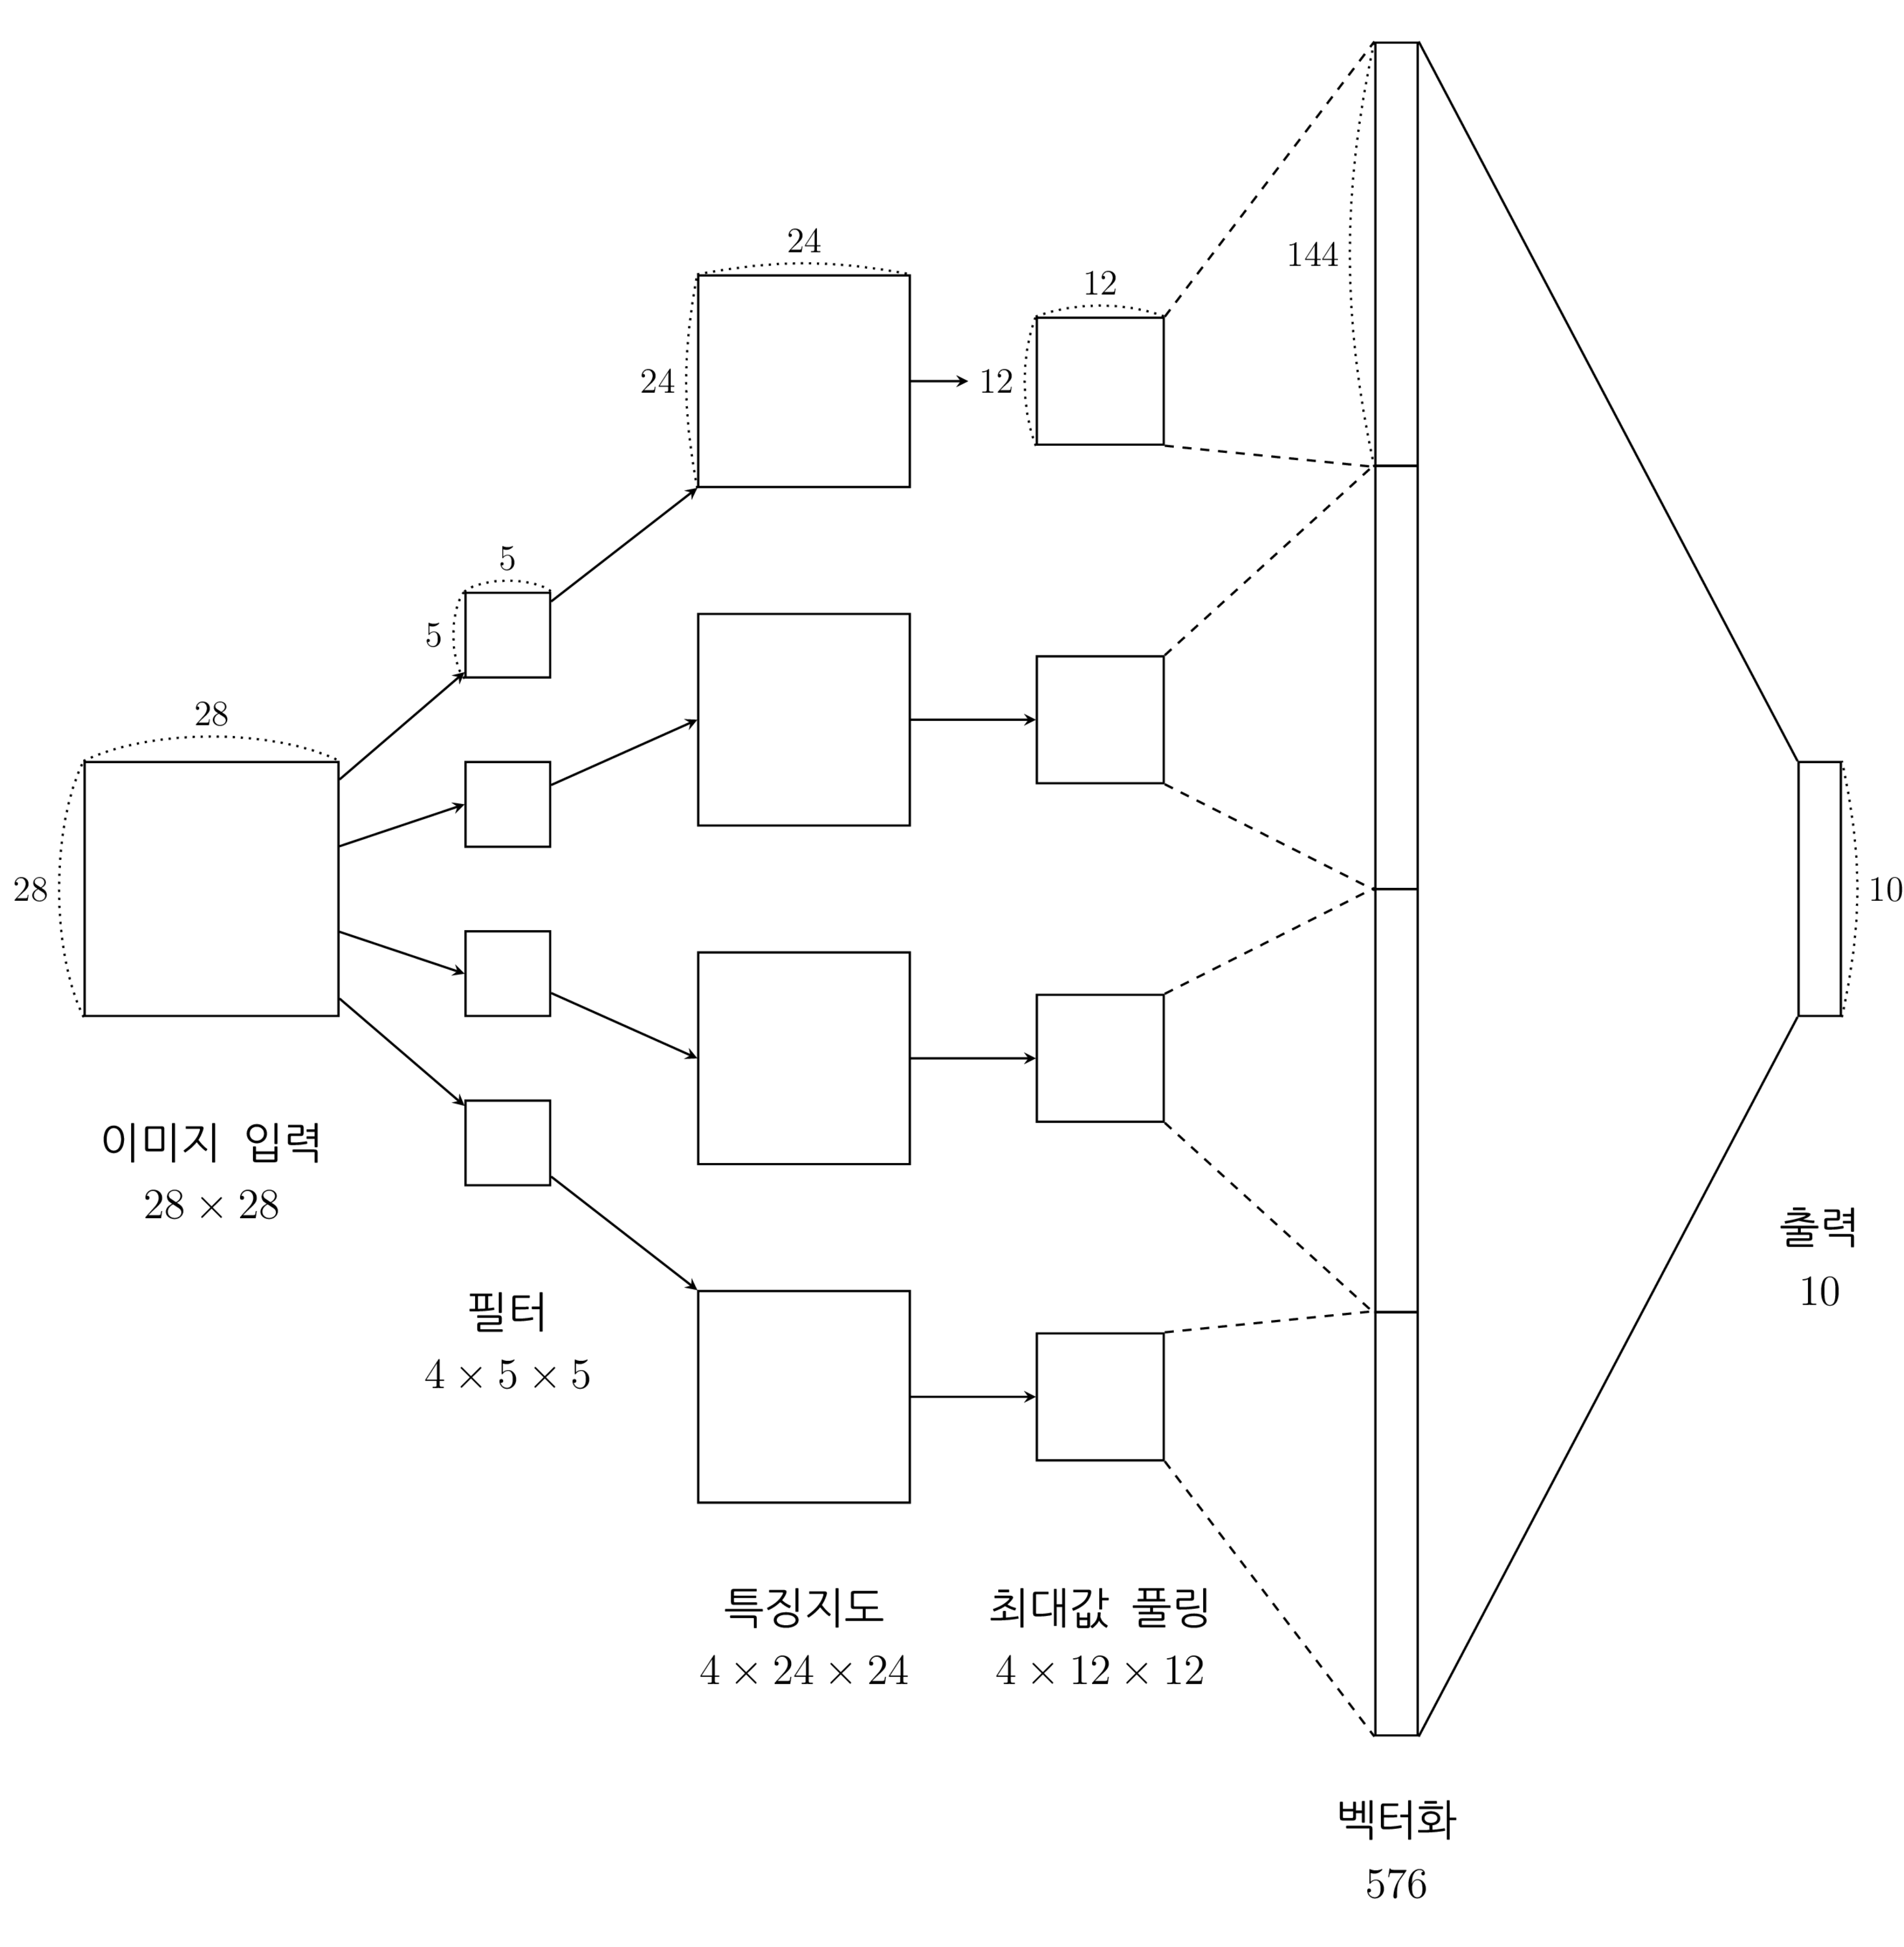

In [8]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc,positioning,shapes,patterns -s 3000,3000 -f png

\coordinate (leftbottom) at (0,-7.5);
\coordinate (righttop) at (22.5,15.5);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines,white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}
\begin{scope}[line width=0.7pt]
\node [draw,rectangle,minimum height=3cm,minimum width=3cm] (input) at (2.5,5) {};
\draw [dotted] (input.south west) .. controls ([xshift=-11pt,yshift=-21pt]input.west) and ([xshift=-11pt,yshift=21pt]input.west) .. node [left] {\large $28$} (input.north west);
\draw [dotted] (input.north west) .. controls ([xshift=-21pt,yshift=11pt]input.north) and ([xshift=21pt,yshift=11pt]input.north) .. node [above] {\large $28$} (input.north east);
\end{scope}

\begin{scope}[xshift=3.5cm,yshift=3cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (kernel) at (2.5,5) {};
\draw [dotted] (kernel.south west) .. controls ([xshift=-5pt,yshift=-9pt]kernel.west) and ([xshift=-5pt,yshift=9pt]kernel.west) .. node [left] {\large $5$} (kernel.north west);
\draw [dotted] (kernel.north west) .. controls ([xshift=-9pt,yshift=5pt]kernel.north) and ([xshift=9pt,yshift=5pt]kernel.north) .. node [above] {\large $5$} (kernel.north east);
\end{scope}

\foreach \x/\y in {1cm/1,-1cm/2,-3cm/3}{
\begin{scope}[xshift=3.5cm,yshift=\x,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (kernel_\y) at (2.5,5) {};
\end{scope}
};


\begin{scope}[xshift=7cm,yshift=6cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.5cm,minimum width=2.5cm] (fea_map) at (2.5,5) {};
\draw [dotted] (fea_map.south west) .. controls ([xshift=-5pt,yshift=-9pt]fea_map.west) and ([xshift=-5pt,yshift=9pt]fea_map.west) .. node [left] {\large $24$} (fea_map.north west);
\draw [dotted] (fea_map.north west) .. controls ([xshift=-9pt,yshift=5pt]fea_map.north) and ([xshift=9pt,yshift=5pt]fea_map.north) .. node [above] {\large $24$} (fea_map.north east);
\end{scope}

\foreach \x/\y in {2cm/1,-2cm/2,-6cm/3}{
\begin{scope}[xshift=7cm,yshift=\x,line width=0.7pt]
\node [draw,rectangle,minimum height=2.5cm,minimum width=2.5cm] (fea_map_\y) at (2.5,5) {};
\end{scope}
};

\begin{scope}[xshift=10.5cm,yshift=6cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1.5cm,minimum width=1.5cm] (maxpool) at (2.5,5) {};
\draw [dotted] (maxpool.south west) .. controls ([xshift=-5pt,yshift=-9pt]maxpool.west) and ([xshift=-5pt,yshift=9pt]maxpool.west) .. node [left] {\large $12$} (maxpool.north west);
\draw [dotted] (maxpool.north west) .. controls ([xshift=-9pt,yshift=5pt]maxpool.north) and ([xshift=9pt,yshift=5pt]maxpool.north) .. node [above] {\large $12$} (maxpool.north east);
\end{scope}

\foreach \x/\y in {2cm/1,-2cm/2,-6cm/3}{
\begin{scope}[xshift=10.5cm,yshift=\x,line width=0.7pt]
\node [draw,rectangle,minimum height=1.5cm,minimum width=1.5cm] (maxpool_\y) at (2.5,5) {};
\end{scope}
};

\begin{scope}[xshift=14cm,yshift=7.5cm,line width=0.7pt]
\node [draw,rectangle,minimum height=5cm,minimum width=0.5cm] (flatten) at (2.5,5) {};
\draw [dotted](flatten.south west) .. controls ([xshift=-11pt,yshift=-21pt]flatten.west) and ([xshift=-11pt,yshift=21pt]flatten.west) .. node [left] {\large $144$} (flatten.north west);
\end{scope}

\foreach \x/\y in {2.5cm/1,-2.5cm/2,-7.5cm/3}{
\begin{scope}[xshift=14cm,yshift=\x,line width=0.7pt]
\node [draw,rectangle,minimum height=5cm,minimum width=0.5cm] (flatten_\y) at (2.5,5) {};
\end{scope}
};

\begin{scope}[xshift=19cm,yshift=0cm,line width=0.7pt]
\node [draw,rectangle,minimum height=3cm,minimum width=0.5cm] (output) at (2.5,5) {};
\draw [dotted] (output.south east) .. controls ([xshift=7pt,yshift=-11pt]output.east) and ([xshift=7pt,yshift=11pt]output.east) .. node [right] {\large $10$} (output.north east);
\end{scope}


\draw[->,line width=0.7] (input) -- (kernel);
\draw[->,line width=0.7] (input) -- (kernel_1.west);
\draw[->,line width=0.7] (input) -- (kernel_2.west);
\draw[->,line width=0.7] (input) -- (kernel_3);
\draw[->,line width=0.7] (kernel) -- (fea_map.south west);
\draw[->,line width=0.7] (kernel_1) -- (fea_map_1.west);
\draw[->,line width=0.7] (kernel_2) -- (fea_map_2.west);
\draw[->,line width=0.7] (kernel_3) -- (fea_map_3.north west);

\draw[->,line width=0.7] (fea_map) -- ([xshift=-0.8cm]maxpool.west);
\draw[->,line width=0.7] (fea_map_1) -- (maxpool_1.west);
\draw[->,line width=0.7] (fea_map_2) -- (maxpool_2.west);
\draw[->,line width=0.7] (fea_map_3) -- (maxpool_3.west);

\draw[dashed,line width=0.7] (maxpool.north east) -- (flatten.north west);
\draw[dashed,line width=0.7] (maxpool.south east) -- (flatten.south west);
\foreach \x in {1,2,3}{
\draw[dashed,line width=0.7] (maxpool_\x.north east) -- (flatten_\x.north west);
\draw[dashed,line width=0.7] (maxpool_\x.south east) -- (flatten_\x.south west);
}

\draw[line width=0.7] ([yshift=0cm]flatten.north east) -- ([yshift=0cm]output.north west);
\draw[line width=0.7] ([yshift=0cm]flatten_3.south east) -- ([yshift=0cm]output.south west);


\node at (2.5,2) {\Large 이미지 입력};
\node at (2.5,1.25) {\Large $28\times 28$};
\node at (6,0) {\Large 필터};
\node at (6,-0.75) {\Large $4\times 5\times 5$};
\node at (9.5,-3.5) {\Large 특징지도};
\node at (9.5,-4.25) {\Large $4\times  24\times 24$};
\node at (13,-3.5) {\Large 최대값 풀링};
\node at (13,-4.25) {\Large $4\times  12\times 12$};
\node at (16.5,-6) {\Large 벡터화};
\node at (16.5,-6.75) {\Large $576$};
\node at (21.5,1) {\Large 출력};
\node at (21.5,0.25) {\Large $10$};



### 컬러 이미지 CNN

* 컬러 이미지와 같이 입력 채널이 여러개이거나 feature map을 입력으로 받는 다음 단계의 CNN 레이어
* 각각의 채널에 대해 다른 이미지 필터를 하나의 세트로 사용하여 필터링 한 결과를 합산

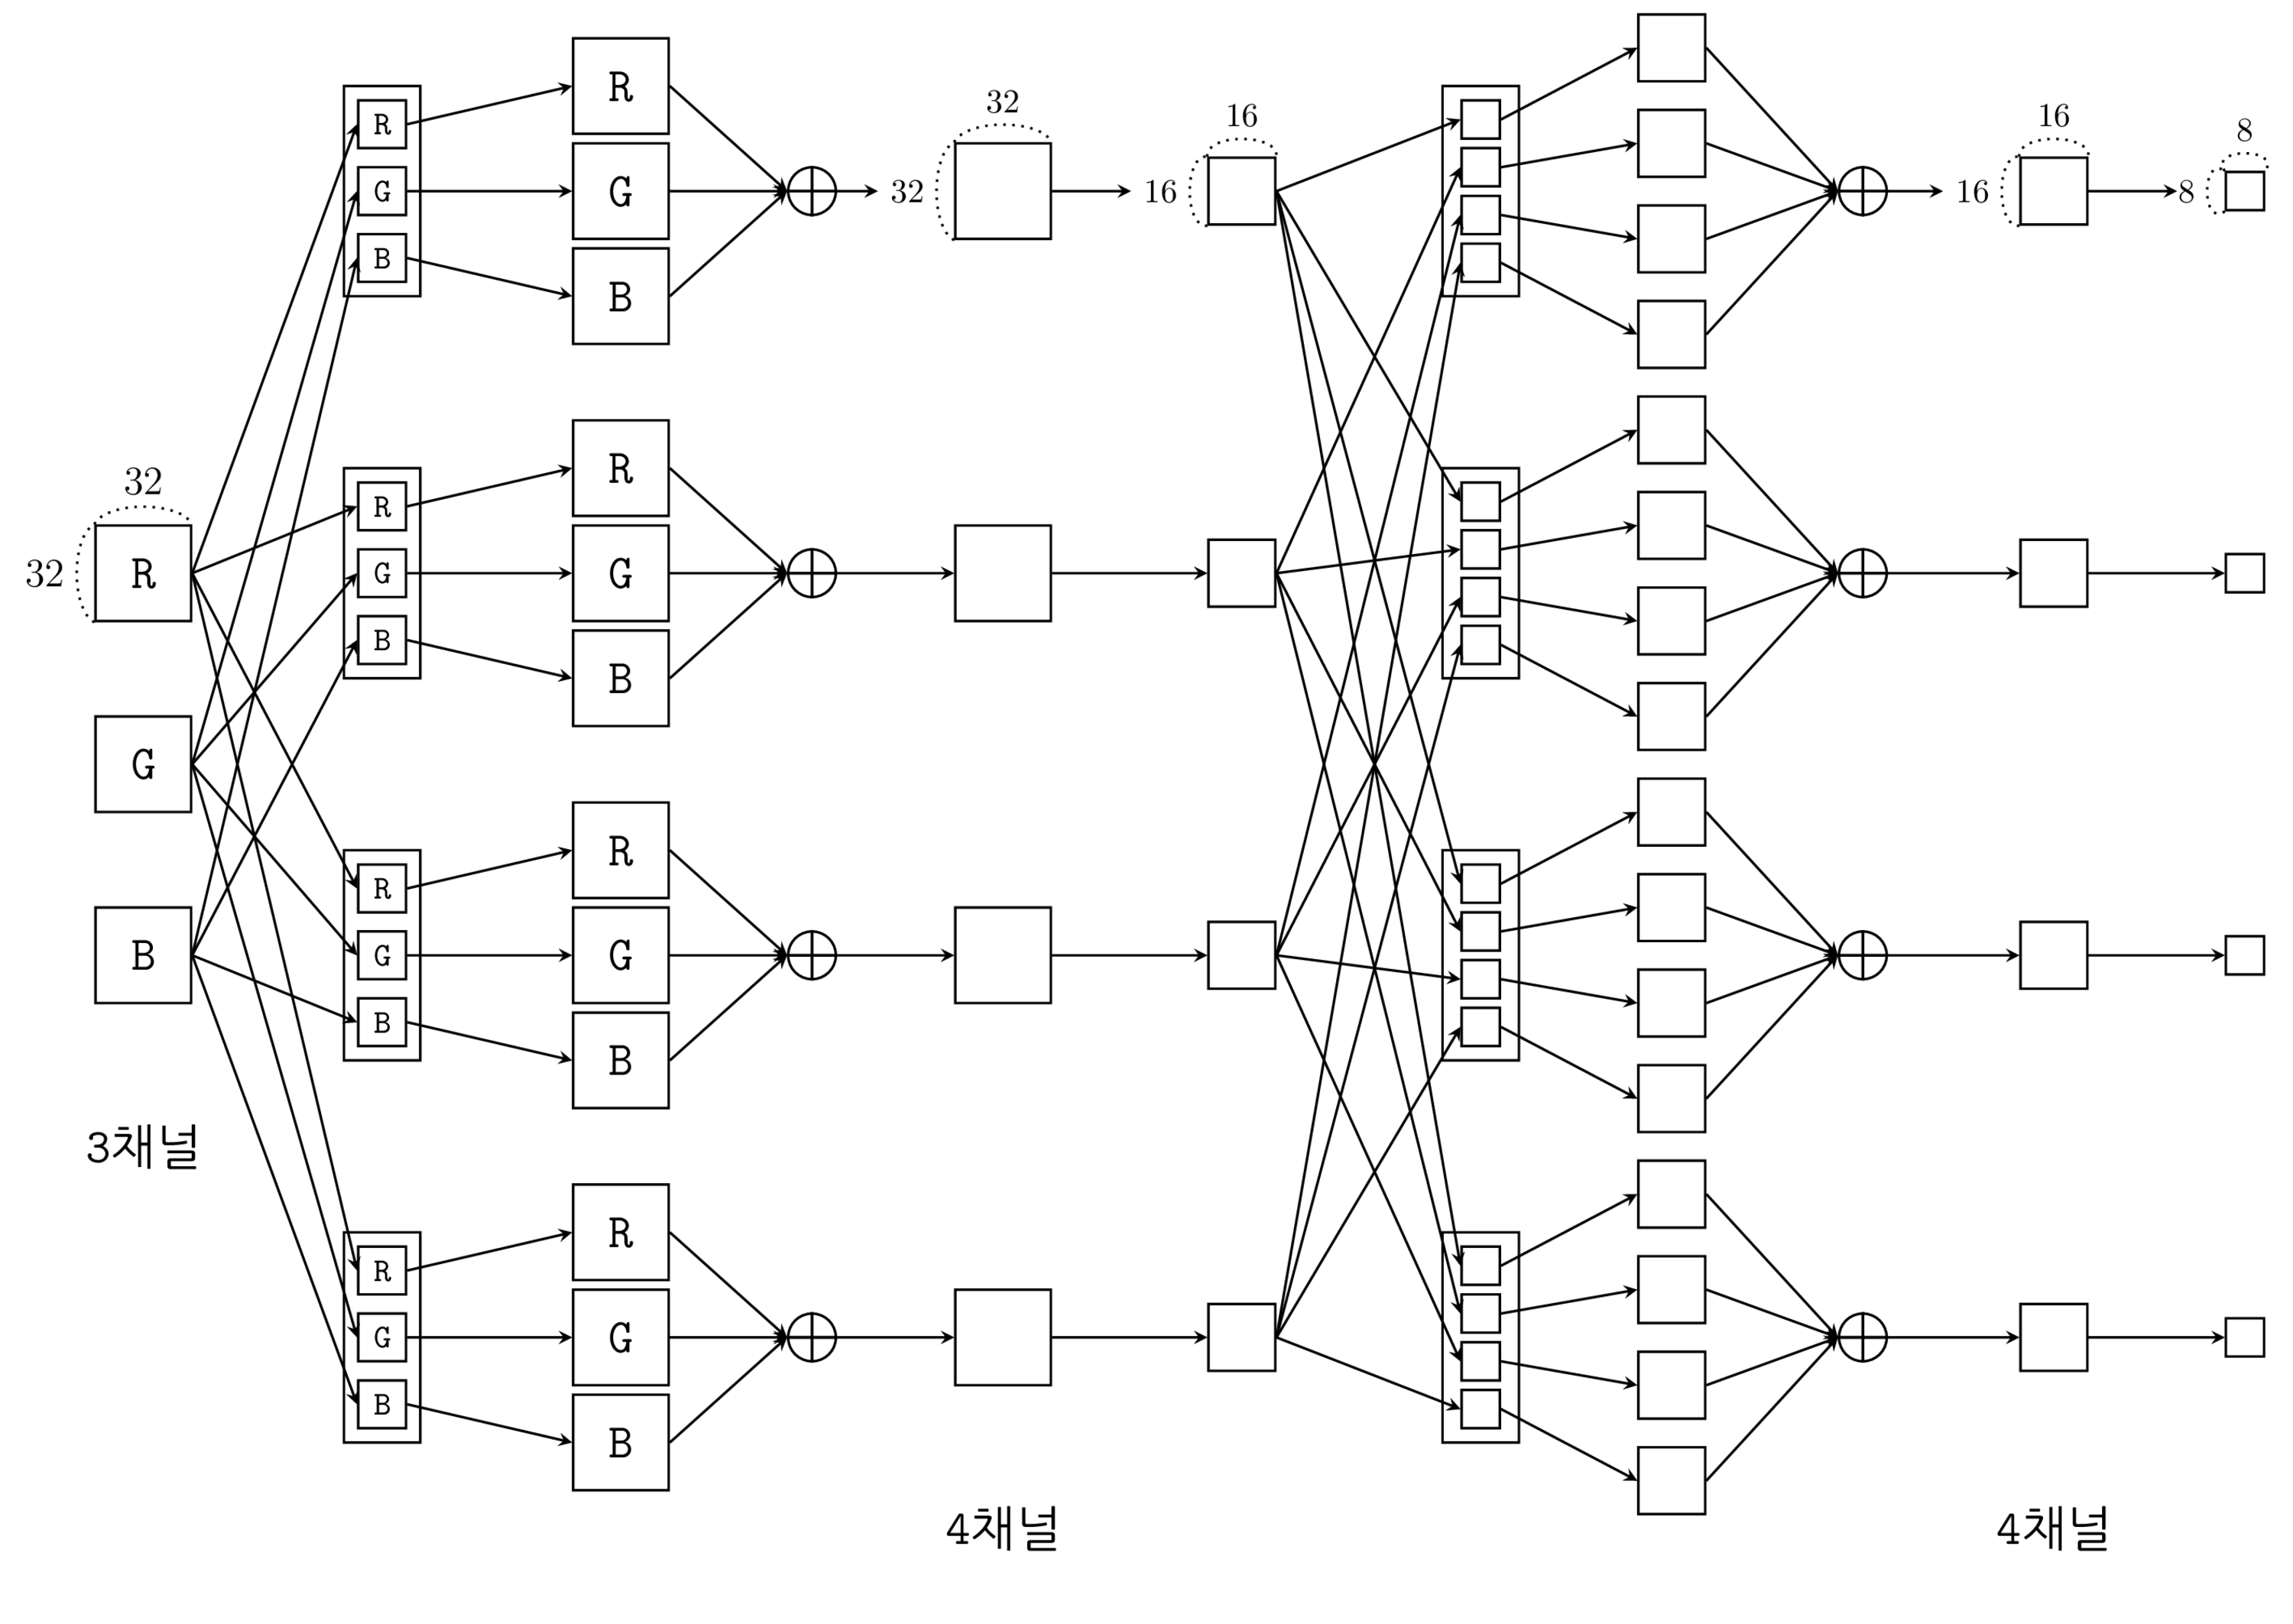

In [9]:
%%tikz -p kotex,pgfplots -l arrows.meta,calc,positioning,shapes,patterns -s 3000,3000 -f png

\coordinate (leftbottom) at (0,6);
\coordinate (righttop) at (24,23);
\fill[white,use as bounding box] (leftbottom) rectangle (righttop);
\draw[help lines,white] (leftbottom) grid (righttop);
\tikzset{
    >=stealth,font={\ttfamily\normalsize},
}

%%%% 1

\begin{scope}[yshift=17cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm,line width=0.7pt] (input_R) at (1.5,0) {\Large R};
\draw [dotted] (input_R.south west) .. controls ([xshift=-7pt,yshift=-11pt]input_R.west) and ([xshift=-7pt,yshift=11pt]input_R.west) .. node [left] {\large $32$} (input_R.north west);
\draw [dotted] (input_R.north west) .. controls ([xshift=-11pt,yshift=7pt]input_R.north) and ([xshift=11pt,yshift=7pt] input_R.north) .. node [above] {\large $32$} (input_R.north east);
\end{scope}

\foreach \x/\y in {15/G, 13/B}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (input_\y) at (1.5,0) {\Large \y};
\end{scope}
}

%%%% 2
\begin{scope}[yshift=21 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] (fm) at (4,0) {};
\end{scope}
\foreach \x/\y/\z in {21.7/1/R, 21/2/G, 20.3/3/B}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.5cm,minimum width=0.5cm] (kernel_\y) at (4,0) {\z};
\end{scope}}
\begin{scope}[yshift=17 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] (fm) at (4,0) {};
\end{scope}
\foreach \x/\y/\z in {17.7/4/R, 17/5/G, 16.3/6/B}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.5cm,minimum width=0.5cm] (kernel_\y) at (4,0) {\z};
\end{scope}}
\begin{scope}[yshift=13 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] (fm) at (4,0) {};
\end{scope}
\foreach \x/\y/\z in {13.7/7/R, 13/8/G, 12.3/9/B}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.5cm,minimum width=0.5cm] (kernel_\y) at (4,0) {\z};
\end{scope}}
\begin{scope}[yshift=9 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] (fm) at (4,0) {};
\end{scope}
\foreach \x/\y/\z in {9.7/10/R, 9/11/G, 8.3/12/B}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.5cm,minimum width=0.5cm] (kernel_\y) at (4,0) {\z};
\end{scope}}

%%%%%% 1 -> 2 

\foreach \x in {1,4,7,10}
\draw[->,line width=0.7pt] (input_R.east) -- (kernel_\x.west);


\foreach \x in {2,5,8,11}
\draw[->,line width=0.7pt] (input_G.east) -- (kernel_\x.west);



\foreach \x in {3,6,9,12}
\draw[->,line width=0.7pt] (input_B.east) -- (kernel_\x.west);

%%%% 3

\foreach \x/\y/\z in {22.1/R/1, 21/G/2, 19.9/B/3}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (fm\z) at (6.5,0) {\Large \y};
\end{scope}
}
\foreach \x/\y/\z in {18.1/R/4, 17/G/5, 15.9/B/6}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (fm\z) at (6.5,0) {\Large \y};
\end{scope}
}
\foreach \x/\y/\z in {14.1/R/7, 13/G/8, 11.9/B/9}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (fm\z) at (6.5,0) {\Large \y};
\end{scope}
}
\foreach \x/\y/\z in {10.1/R/10, 9/G/11, 7.9/B/12}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (fm\z) at (6.5,0) {\Large \y};
\end{scope}
}

%%%%% 2 -> 3 
\foreach \x in {1,2,...,12}
\draw[->,line width=0.7pt] (kernel_\x.east) -- (fm\x.west);

%%%%% 4 
\foreach \x/\y in {21/1, 17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm]
\node [draw,circle,minimum width=0.5cm,line width=0.7pt] (op\y)at (8.5,0) {};
\draw [line width=0.8pt] (op\y.north) -- (op\y.south) ;
\draw [line width=0.8pt] (op\y.east) -- (op\y.west) ;
\end{scope}
}

%%%%% 3 -> 4 
\foreach \x in {1,2,3}
\draw[->,line width=0.7pt] (fm\x.east) -- (op1.west);

\foreach \x in {4,5,6}
\draw[->,line width=0.7pt] (fm\x.east) -- (op2.west);

\foreach \x in {7,8,9}
\draw[->,line width=0.7pt] (fm\x.east) -- (op3.west);

\foreach \x in {10,11,12}
\draw[->,line width=0.7pt] (fm\x.east) -- (op4.west);


%%%%%% 5 

\begin{scope}[yshift=21cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (re1) at (10.5,0) {};
\draw [dotted] (re1.south west) .. controls ([xshift=-7pt,yshift=-11pt]re1.west) and ([xshift=-7pt,yshift=11pt]re1.west) .. node [left] {$32$}   (re1.north west);
\draw [dotted] (re1.north west) .. controls ([xshift=-11pt,yshift=7pt] re1.north) and ([xshift=11pt,yshift=7pt]re1.north) .. node [above] {$32$} (re1.north east);
\end{scope}

\foreach \x/\y in {17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=1cm,minimum width=1cm] (re\y)at (10.5,0) {};
\end{scope}
}

%%%% 4 -> 5 

\draw[->,line width=0.7pt] (op1.east) -- ([xshift=-0.8cm]re1.west);

\foreach \x in {2,3,4} 
\draw[->,line width=0.7pt] (op\x.east) -- (re\x.west);

%%%% 6 

\begin{scope}[yshift=21cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (po1) at (13,0) {};
\draw [dotted] (po1.south west) .. controls ([xshift=-7pt,yshift=-11pt]po1.west) and ([xshift=-7pt,yshift=11pt]po1.west) .. node [left] {$16$}  (po1.north west);
\draw [dotted] (po1.north west) .. controls ([xshift=-11pt,yshift=7pt]po1.north) and ([xshift=11pt,yshift=7pt] po1.north) .. node [above] {$16$} (po1.north east);
\end{scope}

\foreach \x/\y in {17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (po\y)at (13,0) {};
\end{scope}
}

%%%% 5 -> 6

\draw[->,line width=0.7pt] (re1.east) -- ([xshift=-0.8cm]po1.west);
\foreach \x in {2,3,4} 
\draw[->,line width=0.7pt] (re\x.east) -- (po\x.west);


%%%% 7 
\begin{scope}[yshift=21 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] () at (15.5,0) {};
\end{scope}
\foreach \x/\y in {21.75/1,21.25/2,20.75/3,20.25/4}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (kn\y) at (15.5,0) {};
\end{scope}}

\begin{scope}[yshift=17 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] () at (15.5,0) {};
\end{scope}
\foreach \x/\y in {17.75/5,17.25/6,16.75/7,16.25/8}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (kn\y) at (15.5,0) {};
\end{scope}}

\begin{scope}[yshift=13 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] () at (15.5,0) {};
\end{scope}
\foreach \x/\y in {13.75/9,13.25/10,12.75/11,12.25/12}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (kn\y) at (15.5,0) {};
\end{scope}}

\begin{scope}[yshift=9 cm,line width=0.7pt]
\node [draw,rectangle,minimum height=2.2cm,minimum width=0.8cm] () at (15.5,0) {};
\end{scope}
\foreach \x/\y in {9.75/13,9.25/14,8.75/15,8.25/16}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (kn\y) at (15.5,0) {};
\end{scope}}


%%%%% 6 -> 7

\foreach \x in {1,5,9,13}
\draw[->,line width=0.7pt] (po1.east) -- (kn\x.west);
\foreach \x in {2,6,10,14}
\draw[->,line width=0.7pt] (po2.east) -- (kn\x.west);
\foreach \x in {3,7,11,15}
\draw[->,line width=0.7pt] (po3.east) -- (kn\x.west);
\foreach \x in {4,8,12,16}
\draw[->,line width=0.7pt] (po4.east) -- (kn\x.west);


%%%%% 8 

\foreach \x/\y in {22.5/1,21.5/2,20.5/3,19.5/4}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (fm_\y) at (17.5,0) {};
\end{scope}
}

\foreach \x/\y in {18.5/5,17.5/6,16.5/7,15.5/8}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (fm_\y) at (17.5,0) {};
\end{scope}
}

\foreach \x/\y in {14.5/9,13.5/10,12.5/11,11.5/12}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (fm_\y) at (17.5,0) {};
\end{scope}
}
\foreach \x/\y in {10.5/13,9.5/14,8.5/15,7.5/16}
{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (fm_\y) at (17.5,0) {};
\end{scope}
}

%%% 7 -> 8
\foreach \x in {1,2,...,16} 
\draw[->,line width=0.7pt] (kn\x.east) -- (fm_\x.west);


%%%%% 9 
\foreach \x/\y in {21/1, 17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm]
\node [draw,circle,minimum width=0.5cm,line width=0.7pt] (op\y)at (19.5,0) {};
\draw [line width=0.8pt] (op\y.north) -- (op\y.south) ;
\draw [line width=0.8pt] (op\y.east) -- (op\y.west) ;
\end{scope}
}


%%%%% 8 -> 9

\foreach \x in {1,2,3,4}
\draw[->,line width=0.7pt] (fm_\x.east) -- (op1.west);

\foreach \x in {5,6,7,8}
\draw[->,line width=0.7pt] (fm_\x.east) -- (op2.west);

\foreach \x in {9,10,11,12}
\draw[->,line width=0.7pt] (fm_\x.east) -- (op3.west);

\foreach \x in {13,14,15,16}
\draw[->,line width=0.7pt] (fm_\x.east) -- (op4.west);


%%%%% 10 


\begin{scope}[yshift=21cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (re1) at (21.5,0) {};
\draw [dotted] (re1.south west) .. controls ([xshift=-7pt,yshift=-11pt]re1.west) and ([xshift=-7pt,yshift=11pt]re1.west) .. node [left] {$16$}   (re1.north west);
\draw [dotted] (re1.north west) .. controls ([xshift=-11pt,yshift=7pt] re1.north) and ([xshift=11pt,yshift=7pt]re1.north) .. node [above] {$16$} (re1.north east);
\end{scope}

\foreach \x/\y in {17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.7cm,minimum width=0.7cm] (re\y)at (21.5,0) {};
\end{scope}
}


%%%%% 9 -> 10
\draw[->,line width=0.7pt] (op1.east) -- ([xshift=-0.8cm]re1.west);
\foreach \x in {2,3,4} 
\draw[->,line width=0.7pt] (op\x.east) -- (re\x.west);



%%%% 11

\begin{scope}[yshift=21cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (po1) at (23.5,0) {};
\draw [dotted] (po1.south west) .. controls ([xshift=-7pt,yshift=-11pt]po1.west) and ([xshift=-7pt,yshift=11pt]po1.west) .. node [left] {$8$}  (po1.north west);
\draw [dotted] (po1.north west) .. controls ([xshift=-11pt,yshift=7pt]po1.north) and ([xshift=11pt,yshift=7pt] po1.north) .. node [above] {$8$} (po1.north east);
\end{scope}

\foreach \x/\y in {17/2,13/3,9/4}{
\begin{scope}[yshift=\x cm,line width=0.7pt]
\node [draw,rectangle,minimum height=0.4cm,minimum width=0.4cm] (po\y)at (23.5,0) {};
\end{scope}
}


%%%%% 9 -> 10
\draw[->,line width=0.7pt] (re1.east) -- ([xshift=-0.5cm]po1.west);
\foreach \x in {2,3,4} 
\draw[->,line width=0.7pt] (re\x.east) -- (po\x.west);


\node at (1.5, 11) {\Large 3채널};
\node at (10.5,7) {\Large 4채널};
\node at (21.5,7) {\Large 4채널};


## Demo

* http://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html